In [3]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [4]:
gross = pd.read_csv('final_df.csv')
gross.head()

,Unnamed: 0,name,release_date,genre_x,rating_x,total_gross,inflation_adjusted_gross,genre_y,year,score,votes,director,writer,star,country,budget,gross,company,runtime,star_rating
0,0,101 Dalmatians,27/11/1996,Comedy,G,136189294,258728898,Adventure,1996,5.7,105000,Stephen Herek,Dodie Smith,Glenn Close,United States,75000000,320689294,Walt Disney Pictures,103,NaN
1,1,102 Dalmatians,22/11/2000,Comedy,G,66941559,104055039,Adventure,2000,4.9,36000,Kevin Lima,Dodie Smith,Glenn Close,United States,85000000,183611771,Cruella Productions,100,NaN
2,2,1492: Conquest of Paradise,09/10/1992,Adventure,PG-13,7099531,14421454,Adventure,1992,6.5,29000,Ridley Scott,Rose Bosch,Gérard Depardieu,United Kingdom,47000000,7191399,Gaumont,154,NaN
3,3,25th Hour,19/12/2002,Drama,R,13084595,18325463,Drama,2002,7.6,172000,Spike Lee,David Benioff,Edward Norton,United States,5000000,23932055,25th Hour Productions,135,937.0
4,4,3 Ninjas,07/08/1992,Action,PG,29028000,58965304,Action,1992,5.3,21000,Jon Turteltaub,Kenny Kim,Victor Wong,United States,6500000,29000301,Touchstone Pictures,84,NaN


In [5]:
#summary stats:

gross.describe()

,Unnamed: 0,total_gross,inflation_adjusted_gross,year,score,votes,budget,gross,runtime,star_rating
count,332.000000,3.320000e+02,3.320000e+02,332.000000,332.000000,3.320000e+02,3.320000e+02,3.320000e+02,332.000000,148.000000
mean,165.500000,8.575835e+07,1.192731e+08,2000.858434,6.466566,1.433485e+05,5.833337e+07,1.801412e+08,108.671687,787.243243
std,95.984374,1.017151e+08,1.214955e+08,7.710460,0.929215,2.138251e+05,5.640316e+07,2.597491e+08,18.897818,288.502505
min,0.000000,1.782870e+05,2.958510e+05,1984.000000,3.000000,1.100000e+03,3.000000e+06,1.782780e+05,63.000000,457.000000
25%,82.750000,2.344366e+07,3.905108e+07,1995.000000,5.900000,2.200000e+04,2.000000e+07,2.521196e+07,96.000000,576.500000
50%,165.500000,5.151617e+07,7.802726e+07,2000.000000,6.500000,5.950000e+04,3.500000e+07,7.202481e+07,107.000000,720.000000
75%,248.250000,1.012489e+08,1.593384e+08,2006.000000,7.100000,1.650000e+05,8.000000e+07,2.117263e+08,119.000000,913.750000
max,331.000000,6.232795e+08,7.616409e+08,2016.000000,8.500000,1.300000e+06,2.600000e+08,1.518816e+09,192.000000,2237.000000


In [6]:
# finding the top 10 disney which has made high profit 
inflation_adjusted_gross_desc = gross.sort_values('inflation_adjusted_gross', ascending=False)
inflation_adjusted_gross_desc.head(10)

,Unnamed: 0,name,release_date,genre_x,rating_x,total_gross,inflation_adjusted_gross,genre_y,year,score,votes,director,writer,star,country,budget,gross,company,runtime,star_rating
266,266,The Lion King,15/06/1994,Adventure,G,422780140,761640898,Animation,1994,8.5,970000,Roger Allers,Irene Mecchi,Matthew Broderick,United States,45000000,1083720877,Walt Disney Pictures,88,NaN
233,233,The Avengers,04/05/2012,Action,PG-13,623279547,660081224,Action,2012,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,1077.0
232,232,The Avengers,04/05/2012,Action,PG-13,623279547,660081224,Action,1998,3.8,41000,Jeremiah S. Chechik,Sydney Newman,Ralph Fiennes,United States,60000000,23384939,Warner Bros.,89,601.0
200,200,Rogue One: A Star Wars Story,16/12/2016,Adventure,PG-13,529483936,529483936,Action,2016,7.8,572000,Gareth Edwards,Chris Weitz,Felicity Jones,United States,200000000,1056057720,Lucasfilm,133,488.0
93,93,Finding Nemo,30/05/2003,Adventure,G,380529370,518148559,Animation,2003,8.1,972000,Andrew Stanton,Andrew Stanton,Albert Brooks,United States,94000000,940352645,Pixar Animation Studios,100,NaN
92,92,Finding Dory,17/06/2016,Adventure,PG,486295561,486295561,Animation,2016,7.3,250000,Andrew Stanton,Andrew Stanton,Ellen DeGeneres,United States,200000000,1028570942,Pixar Animation Studios,97,NaN
298,298,The Sixth Sense,06/08/1999,Thriller/Suspense,PG-13,293506292,485424724,Drama,1999,8.1,930000,M. Night Shyamalan,M. Night Shyamalan,Bruce Willis,United States,40000000,672806292,Hollywood Pictures,107,747.0
28,28,Avengers: Age of Ultron,01/05/2015,Action,PG-13,459005868,459005868,Action,2015,7.3,777000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141,1077.0
312,312,Toy Story 3,18/06/2010,Adventure,G,415004880,443408255,Animation,2010,8.2,776000,Lee Unkrich,John Lasseter,Tom Hanks,United States,200000000,1066970811,Walt Disney Pictures,103,1392.0
15,15,Aladdin,11/11/1992,Comedy,G,217350219,441969178,Animation,1992,8.0,382000,Ron Clements,Ron Clements,Scott Weinger,United States,28000000,504050219,Walt Disney Pictures,90,NaN


In [7]:
# Some genres are more popular than others. We group movies by genre and year to check the average gross of each movie in each year

group = gross.groupby(['genre_y', 'year']).mean()
genre_yearly = group.reset_index()
genre_yearly

,genre_y,year,Unnamed: 0,total_gross,inflation_adjusted_gross,score,votes,budget,gross,runtime,star_rating
0,Action,1989,307.000000,4.059000e+07,8.575782e+07,6.20,11000.000000,1.500000e+07,40586886.0,96.000000,720.0
1,Action,1990,85.500000,5.924959e+07,1.183588e+08,5.45,32500.000000,3.450000e+07,88749588.5,95.000000,789.0
2,Action,1991,233.500000,2.892494e+07,5.791857e+07,6.20,29450.000000,1.950000e+07,28990451.0,111.000000,NaN
3,Action,1992,64.000000,1.695278e+07,3.443661e+07,5.75,15250.000000,1.325000e+07,16971790.0,98.000000,NaN
4,Action,1993,297.666667,4.440302e+07,9.067046e+07,6.90,64566.666667,2.333333e+07,44478825.0,115.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...
147,Drama,2011,249.000000,1.697056e+08,1.804050e+08,8.00,436000.000000,2.500000e+07,216639112.0,146.000000,686.0
148,Drama,2015,51.500000,1.367326e+08,1.367326e+08,7.25,230000.000000,6.750000e+07,353918339.5,123.500000,1392.0
149,Drama,2016,265.000000,1.254598e+07,1.254598e+07,7.20,54000.000000,2.000000e+07,25975621.0,133.000000,817.0
150,Fantasy,2006,217.000000,2.308648e+07,2.971282e+07,5.10,31000.000000,7.000000e+06,27298695.0,85.000000,NaN


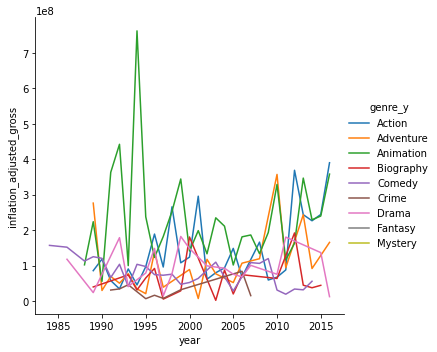

In [13]:
sns.relplot(x='year', y='inflation_adjusted_gross', kind='line', hue='genre_y',data=genre_yearly)

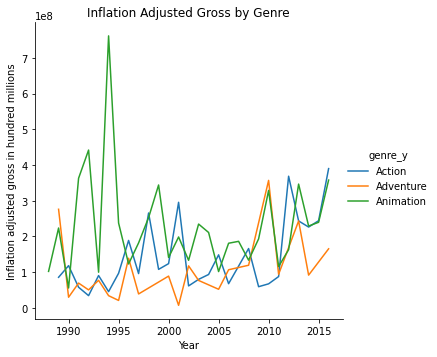

In [14]:
# visualizing how box office revenue changes over time
genre_yearly_1 = genre_yearly[(genre_yearly.genre_y == 'Action') | (genre_yearly.genre_y == 'Adventure') | (genre_yearly.genre_y == 'Animation')]
ax = sns.relplot(x='year', y='inflation_adjusted_gross', kind='line', hue='genre_y',data=genre_yearly_1)  
ax.set(xlabel='Year', ylabel='Inflation adjusted gross in hundred millions', title = 'Inflation Adjusted Gross by Genre')


# figure size in inches
#rcParams['figure.figsize'] = 20,15


In [16]:
group_1 = gross.groupby(['genre_y']).mean()
genre_yearly = group_1.reset_index()
genre_yearly.head(10)

,genre_y,Unnamed: 0,total_gross,inflation_adjusted_gross,year,score,votes,budget,gross,runtime,star_rating
0,Action,162.571429,1.172154e+08,1.481195e+08,2002.371429,6.490000,217162.857143,9.045000e+07,2.599477e+08,118.342857,770.860465
1,Adventure,150.600000,7.017761e+07,9.397875e+07,2001.225000,5.980000,75022.500000,5.201750e+07,1.463857e+08,105.200000,782.909091
2,Animation,176.690909,1.672741e+08,2.237018e+08,2003.563636,7.149091,299432.727273,1.070273e+08,4.117673e+08,90.527273,711.470588
3,Biography,166.086957,4.098404e+07,5.765738e+07,2001.652174,7.082609,69930.434783,3.134783e+07,5.772097e+07,127.130435,766.600000
4,Comedy,167.810526,4.926741e+07,8.284444e+07,1998.178947,6.086316,59646.315789,2.799453e+07,7.441033e+07,104.378947,829.062500
5,Crime,130.636364,1.801643e+07,2.944848e+07,1997.727273,6.027273,26100.000000,2.163636e+07,2.314664e+07,107.181818,577.333333
6,Drama,176.333333,6.654073e+07,9.935466e+07,2000.944444,6.736111,147352.777778,3.895833e+07,1.224922e+08,121.750000,847.866667
7,Fantasy,217.000000,2.308648e+07,2.971282e+07,2006.000000,5.100000,31000.000000,7.000000e+06,2.729870e+07,85.000000,NaN
8,Mystery,60.000000,1.975047e+07,4.080482e+07,1994.000000,5.200000,23000.000000,4.000000e+07,1.972605e+07,121.000000,747.000000


<BarContainer object of 9 artists>

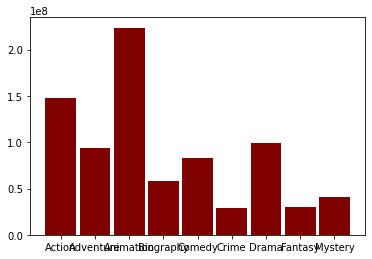

In [17]:
plt.bar(genre_yearly['genre_y'], genre_yearly['inflation_adjusted_gross'], color ='maroon', width = 0.9)

In [18]:
genre_dummies = pd.get_dummies(data=gross['genre_x'])
genre_dummies

,Action,Adventure,Black Comedy,Comedy,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
327,0,1,0,0,0,0,0,0,0,0
328,0,1,0,0,0,0,0,0,0,0
329,0,1,0,0,0,0,0,0,0,0
330,0,0,0,1,0,0,0,0,0,0


In [19]:
genre_dummies.shape

(332, 10)

In [20]:
gross.shape

(332, 20)

In [10]:
comedy = gross[gross['genre_y'] == 'Comedy']
adventure = gross[gross['genre_y'] == 'Adventure']
drama = gross[gross['genre_y'] == 'Drama']
action = gross[gross['genre_y'] == 'Action']
animation = gross[gross['genre_y'] == 'Animation']
crime = gross[gross['genre_y'] == 'Crime']
biography = gross[gross['genre_y'] == 'Biography']
mystery = gross[gross['genre_y'] == 'Mystery']
fantasy = gross[gross['genre_y'] == 'Fantasy']

In [11]:
data = [comedy['inflation_adjusted_gross'],adventure['inflation_adjusted_gross'],drama['inflation_adjusted_gross'],action['inflation_adjusted_gross'],animation['inflation_adjusted_gross'],crime['inflation_adjusted_gross'],biography['inflation_adjusted_gross'],mystery['inflation_adjusted_gross'],fantasy['inflation_adjusted_gross']]

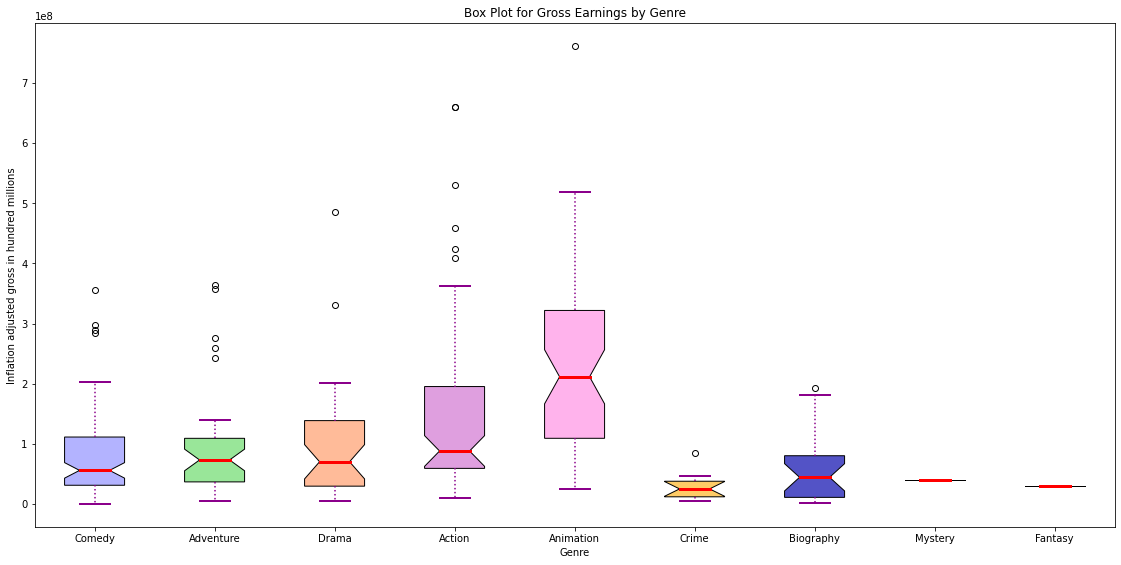

In [12]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True, notch ='True')

colors = ['#b3b3ff', '#99e699',
          '#ffbb99', '#df9fdf','#ffb3ec', '#ffcc66',
          '#5353c6', '#75a3a3','#b300b3']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
ax.set_xticklabels(['Comedy', 'Adventure',
                    'Drama', 'Action','Animation','Crime','Biography','Mystery','Fantasy'])
 
ax.set(xlabel='Genre', ylabel='Inflation adjusted gross in hundred millions',title='Box Plot for Gross Earnings by Genre')
# show plot
plt.show()

In [21]:
result = pd.concat([gross, genre_dummies], axis=1, join="inner")

In [22]:
r = result.copy()
factor = result['inflation_adjusted_gross'] / result['total_gross']
result['inflation_budget'] = result['budget'] * factor

In [23]:
import numpy as np
result['log_gross'] = np.log(result['inflation_adjusted_gross'])
result['log_budget'] = np.log(result['inflation_budget'])

In [24]:
result.columns

Index(['Unnamed: 0', 'name', 'release_date', 'genre_x', 'rating_x',
       'total_gross', 'inflation_adjusted_gross', 'genre_y', 'year', 'score',
       'votes', 'director', 'writer', 'star', 'country', 'budget', 'gross',
       'company', 'runtime', 'star_rating', 'Action', 'Adventure',
       'Black Comedy', 'Comedy', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'inflation_budget',
       'log_gross', 'log_budget'],
      dtype='object')

In [25]:
model = sm.OLS.from_formula('log_gross ~  Action', result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_gross   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.386
Date:                Sun, 04 Dec 2022   Prob (F-statistic):             0.0370
Time:                        22:27:09   Log-Likelihood:                -518.64
No. Observations:                 332   AIC:                             1041.
Df Residuals:                     330   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.0260      0.067    268.390      0.000      17.894      18.158
Action         0.4332      0.207      2.094      0.037       0.026       0.840
==============================================================================
Omnibus:                       46.335   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.335
Skew:                          -0.854   Prob(JB):                     1.96e-16
Kurtosis:                       4.520   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~  Action', result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.019
Model:                                  OLS   Adj. R-squared:                  0.016
Method:                       Least Squares   F-statistic:                     6.307
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):             0.0125
Time:                              22:27:13   Log-Likelihood:                -6647.8
No. Observations:                       332   AIC:                         1.330e+04
Df Residuals:                           330   BIC:                         1.331e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.136e+08   6.99e+06     16.238      0.000    9.98e+07    1.27e+08
Action       5.41e+07   2.15e+07      2.511      0.013    1.17e+07    9.65e+07
==============================================================================
Omnibus:                      139.488   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.242
Skew:                           1.904   Prob(JB):                    1.05e-103
Kurtosis:                       7.448   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~  Action + inflation_budget + star_rating + score', result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.363
Model:                                  OLS   Adj. R-squared:                  0.346
Method:                       Least Squares   F-statistic:                     20.41
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           2.55e-13
Time:                              22:27:16   Log-Likelihood:                -2943.0
No. Observations:                       148   AIC:                             5896.
Df Residuals:                           143   BIC:                             5911.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.992e+08   6.62e+07     -3.007      0.003    -3.3e+08   -6.83e+07
Action            5.164e+07   2.67e+07      1.934      0.055   -1.15e+06    1.04e+08
inflation_budget     0.9061      0.148      6.131      0.000       0.614       1.198
star_rating       3.326e+04   3.08e+04      1.080      0.282   -2.76e+04    9.41e+04
score             3.385e+07   1.01e+07      3.364      0.001     1.4e+07    5.37e+07
==============================================================================
Omnibus:                       78.622   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.772
Skew:                           1.913   Prob(JB):                     6.26e-85
Kurtosis:                       9.945   Cond. No.                     8.43e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model = sm.OLS.from_formula('log_gross ~  Action + log_budget + star_rating + score', result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_gross   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     20.69
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.81e-13
Time:                        22:27:19   Log-Likelihood:                -202.69
No. Observations:                 148   AIC:                             415.4
Df Residuals:                     143   BIC:                             430.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9840      1.982      1.001      0.318      -1.933       5.901
Action          0.1508      0.242      0.622      0.535      -0.329       0.630
log_budget      0.7755      0.109      7.127      0.000       0.560       0.991
star_rating     0.0002      0.000      0.691      0.490      -0.000       0.001
score           0.3186      0.090      3.548      0.001       0.141       0.496
==============================================================================
Omnibus:                       20.186   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.332
Skew:                          -0.609   Prob(JB):                     2.88e-09
Kurtosis:                       5.212   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
result['star_rating'] = result["star_rating"].fillna(0)
result["budget"].dropna()
result["score"].dropna()
len(result)
result[['star_rating']]

,star_rating
0,0.0
1,0.0
2,0.0
3,937.0
4,0.0
...,...
327,0.0
328,0.0
329,506.0
330,562.0


In [30]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~  Action + star_rating + inflation_budget + score + star_rating:Action + score:Action', result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.384
Model:                                  OLS   Adj. R-squared:                  0.373
Method:                       Least Squares   F-statistic:                     33.83
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           1.15e-31
Time:                              22:27:26   Log-Likelihood:                -6570.3
No. Observations:                       332   AIC:                         1.315e+04
Df Residuals:                           325   BIC:                         1.318e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.317e+08   3.98e+07     -5.816      0.000    -3.1e+08   -1.53e+08
Action              2.018e+08   1.13e+08      1.779      0.076   -2.13e+07    4.25e+08
star_rating         7952.9229   1.28e+04      0.620      0.536   -1.73e+04    3.32e+04
inflation_budget       0.8096      0.090      9.014      0.000       0.633       0.986
score               4.333e+07   6.21e+06      6.973      0.000    3.11e+07    5.56e+07
star_rating:Action  1.212e+05   4.37e+04      2.776      0.006    3.53e+04    2.07e+05
score:Action       -3.685e+07   1.83e+07     -2.012      0.045   -7.29e+07   -8.15e+05
==============================================================================
Omnibus:                      142.153   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.430
Skew:                           1.733   Prob(JB):                    3.02e-163
Kurtosis:                       9.487   Cond. No.                     2.24e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model = sm.OLS.from_formula('log_gross ~  Action + star_rating + log_budget + score + star_rating:Action + score:Action', result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_gross   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.01e-26
Time:                        22:27:30   Log-Likelihood:                -452.15
No. Observations:                 332   AIC:                             918.3
Df Residuals:                     325   BIC:                             944.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.3567      1.191      3.658      0.000       2.014       6.700
Action                 0.7614      1.123      0.678      0.498      -1.447       2.970
star_rating         6.356e-05      0.000      0.499      0.618      -0.000       0.000
log_budget             0.6492      0.067      9.651      0.000       0.517       0.781
score                  0.3196      0.062      5.192      0.000       0.199       0.441
star_rating:Action     0.0003      0.000      0.733      0.464      -0.001       0.001
score:Action          -0.1220      0.181     -0.673      0.501      -0.479       0.235
==============================================================================
Omnibus:                       44.641   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.021
Skew:                          -0.824   Prob(JB):                     6.24e-16
Kurtosis:                       4.531   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
genre_yearly.columns

Index(['genre_y', 'Unnamed: 0', 'total_gross', 'inflation_adjusted_gross',
       'year', 'score', 'votes', 'budget', 'gross', 'runtime', 'star_rating'],
      dtype='object')

In [33]:
result1 = result[(result["company"] != "Marvel Studios")]
result1 = result1[(result1["company"] != "Marvel Entertainment")]

In [34]:
len(result1)

324

In [35]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~  Action + star_rating + inflation_budget + score + star_rating:Action + score:Action', result1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.332
Model:                                  OLS   Adj. R-squared:                  0.319
Method:                       Least Squares   F-statistic:                     26.22
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           2.64e-25
Time:                              22:27:56   Log-Likelihood:                -6404.6
No. Observations:                       324   AIC:                         1.282e+04
Df Residuals:                           317   BIC:                         1.285e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.288e+08   3.91e+07     -5.845      0.000   -3.06e+08   -1.52e+08
Action              4.244e+08   1.24e+08      3.413      0.001     1.8e+08    6.69e+08
star_rating         7237.3610   1.27e+04      0.572      0.568   -1.77e+04    3.21e+04
inflation_budget       0.7692      0.089      8.628      0.000       0.594       0.945
score               4.336e+07    6.1e+06      7.105      0.000    3.14e+07    5.54e+07
star_rating:Action  3.449e+04    4.8e+04      0.719      0.473   -5.99e+04    1.29e+05
score:Action       -7.067e+07   1.99e+07     -3.551      0.000    -1.1e+08   -3.15e+07
==============================================================================
Omnibus:                      138.575   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.779
Skew:                           1.747   Prob(JB):                    6.06e-151
Kurtosis:                       9.248   Cond. No.                     2.38e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~  Action + star_rating + inflation_budget + score + star_rating:Action + score:Action', result).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.384
Model:                                  OLS   Adj. R-squared:                  0.373
Method:                       Least Squares   F-statistic:                     33.83
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           1.15e-31
Time:                              22:28:05   Log-Likelihood:                -6570.3
No. Observations:                       332   AIC:                         1.315e+04
Df Residuals:                           325   BIC:                         1.318e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.317e+08   3.98e+07     -5.816      0.000    -3.1e+08   -1.53e+08
Action              2.018e+08   1.13e+08      1.779      0.076   -2.13e+07    4.25e+08
star_rating         7952.9229   1.28e+04      0.620      0.536   -1.73e+04    3.32e+04
inflation_budget       0.8096      0.090      9.014      0.000       0.633       0.986
score               4.333e+07   6.21e+06      6.973      0.000    3.11e+07    5.56e+07
star_rating:Action  1.212e+05   4.37e+04      2.776      0.006    3.53e+04    2.07e+05
score:Action       -3.685e+07   1.83e+07     -2.012      0.045   -7.29e+07   -8.15e+05
==============================================================================
Omnibus:                      142.153   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.430
Skew:                           1.733   Prob(JB):                    3.02e-163
Kurtosis:                       9.487   Cond. No.                     2.24e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
factor = result1['inflation_adjusted_gross'] / result1['total_gross']
result1['inflation_budget'] = result1['budget'] * factor
result

,Unnamed: 0,name,release_date,genre_x,rating_x,total_gross,inflation_adjusted_gross,genre_y,year,score,...,Comedy,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,inflation_budget,log_gross,log_budget
0,0,101 Dalmatians,27/11/1996,Comedy,G,136189294,258728898,Adventure,1996,5.7,...,1,0,0,0,0,0,0,1.424831e+08,19.371291,18.774734
1,1,102 Dalmatians,22/11/2000,Comedy,G,66941559,104055039,Adventure,2000,4.9,...,1,0,0,0,0,0,0,1.321254e+08,18.460431,18.699262
2,2,1492: Conquest of Paradise,09/10/1992,Adventure,PG-13,7099531,14421454,Adventure,1992,6.5,...,0,0,0,0,0,0,0,9.547227e+07,16.484228,18.374346
3,3,25th Hour,19/12/2002,Drama,R,13084595,18325463,Drama,2002,7.6,...,0,1,0,0,0,0,0,7.002686e+06,16.723802,15.761804
4,4,3 Ninjas,07/08/1992,Action,PG,29028000,58965304,Action,1992,5.3,...,0,0,0,0,0,0,0,1.320361e+07,17.892460,16.396001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,327,White Squall,02/02/1996,Adventure,PG-13,10229300,19509726,Adventure,1996,6.6,...,0,0,0,0,0,0,0,7.247510e+07,16.786424,18.098754
328,328,Winnie the Pooh,15/07/2011,Adventure,G,26692846,28375869,Animation,2011,7.2,...,0,0,0,0,0,0,0,3.189154e+07,17.161050,17.277851
329,329,Wreck-It Ralph,02/11/2012,Adventure,PG,189412677,200354959,Animation,2012,7.7,...,0,0,0,0,0,0,0,1.745320e+08,19.115601,18.977619
330,330,You Again,24/09/2010,Comedy,PG,25702053,27461121,Comedy,2010,5.8,...,1,0,0,0,0,0,0,2.136882e+07,17.128282,16.877443


In [40]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~ inflation_budget + score + star_rating + inflation_budget:score + inflation_budget:star_rating', result).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.422
Model:                                  OLS   Adj. R-squared:                  0.413
Method:                       Least Squares   F-statistic:                     47.59
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           6.99e-37
Time:                              22:29:11   Log-Likelihood:                -6559.9
No. Observations:                       332   AIC:                         1.313e+04
Df Residuals:                           326   BIC:                         1.315e+04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5.829e+07   6.01e+07      0.969      0.333      -6e+07    1.77e+08
inflation_budget                -2.8261      0.666     -4.242      0.000      -4.137      -1.515
score                        -7.975e+05   9.37e+06     -0.085      0.932   -1.92e+07    1.76e+07
star_rating                   8117.3559   1.89e+04      0.429      0.668   -2.91e+04    4.53e+04
inflation_budget:score           0.5354      0.100      5.379      0.000       0.340       0.731
inflation_budget:star_rating     0.0002      0.000      0.823      0.411      -0.000       0.001
==============================================================================
Omnibus:                      202.336   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.288
Skew:                           2.363   Prob(JB):                         0.00
Kurtosis:                      14.477   Cond. No.                     7.21e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model = sm.OLS.from_formula('inflation_adjusted_gross ~ score + star_rating + inflation_budget', result).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     inflation_adjusted_gross   R-squared:                       0.363
Model:                                  OLS   Adj. R-squared:                  0.357
Method:                       Least Squares   F-statistic:                     62.36
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           6.31e-32
Time:                              22:29:16   Log-Likelihood:                -6576.0
No. Observations:                       332   AIC:                         1.316e+04
Df Residuals:                           328   BIC:                         1.318e+04
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.089e+08   3.77e+07     -5.541      0.000   -2.83e+08   -1.35e+08
score              3.91e+07   5.94e+06      6.581      0.000    2.74e+07    5.08e+07
star_rating        1.89e+04   1.24e+04      1.530      0.127   -5398.236    4.32e+04
inflation_budget     0.8532      0.087      9.778      0.000       0.682       1.025
==============================================================================
Omnibus:                      182.962   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1557.425
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      12.703   Cond. No.                     7.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
result.corr()

,Unnamed: 0,total_gross,inflation_adjusted_gross,year,score,votes,budget,gross,runtime,star_rating,...,Comedy,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,inflation_budget,log_gross,log_budget
Unnamed: 0,1.000000,0.022272,0.033393,0.079221,0.166461,0.068580,-0.035607,-0.019452,-0.020744,0.083361,...,-0.048386,-0.021811,-0.058477,-0.048125,0.068494,0.023919,0.081269,-0.060513,0.057155,-0.030215
total_gross,0.022272,1.000000,0.945952,0.410596,0.392150,0.766071,0.661141,0.918435,0.050582,0.140061,...,-0.198191,-0.215151,-0.073449,0.026585,-0.040438,-0.018863,-0.049812,0.579302,0.731692,0.518774
inflation_adjusted_gross,0.033393,0.945952,1.000000,0.202528,0.409456,0.750387,0.536316,0.852889,0.001009,0.136963,...,-0.164775,-0.226389,-0.084084,0.039949,-0.033268,-0.001325,-0.054993,0.520826,0.801473,0.489873
year,0.079221,0.410596,0.202528,1.000000,0.231510,0.371077,0.576625,0.480361,0.142681,0.120607,...,-0.183298,-0.046335,0.009203,-0.007363,-0.017555,-0.012303,0.016315,0.388059,0.179088,0.318403
score,0.166461,0.392150,0.409456,0.231510,1.000000,0.597719,0.275568,0.450121,0.274182,0.092121,...,-0.327885,0.145002,-0.091239,0.020449,-0.024746,0.011140,0.034664,0.234374,0.346521,0.214220
votes,0.068580,0.766071,0.750387,0.371077,0.597719,1.000000,0.555163,0.813403,0.124544,0.223769,...,-0.235325,-0.191786,-0.052744,0.027946,-0.049824,0.108188,-0.034756,0.491868,0.560815,0.440843
budget,-0.035607,0.661141,0.536316,0.576625,0.275568,0.555163,1.000000,0.752615,0.163369,0.101438,...,-0.280929,-0.248342,-0.074186,-0.058258,-0.095049,-0.083064,0.054972,0.949239,0.503176,0.845101
gross,-0.019452,0.918435,0.852889,0.480361,0.450121,0.813403,0.752615,1.000000,0.077897,0.138410,...,-0.227837,-0.229509,-0.066077,0.021227,-0.041255,-0.022222,-0.051049,0.662614,0.658303,0.572324
runtime,-0.020744,0.050582,0.001009,0.142681,0.274182,0.124544,0.163369,0.077897,1.000000,0.168647,...,-0.315993,0.372867,-0.039046,-0.014887,0.043364,0.021803,0.152552,0.164622,0.002684,0.164037
star_rating,0.083361,0.140061,0.136963,0.120607,0.092121,0.223769,0.101438,0.138410,0.168647,1.000000,...,0.014691,-0.048088,-0.047364,-0.099564,0.095175,0.085118,-0.003587,0.093427,0.108001,0.106085
